<a href="https://colab.research.google.com/github/achluky/EI7007-Pebelejaran-Mesin-Lanjut/blob/main/Tugas_1B_Regresi_Boston_Housing_Price_dengan_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persoalan regresi dengan menggunakan neural network (multilayer perceptron- MLP)

Pada permasalahan ini penulis akan mencoba melakukan eksplorasi terkait dengan hyperparameter yang berpengaruh pada neural network (multilayer perceptron) atau disebut juga dengan fully connected layer (FCL). Adapun kasus data yang digunakan adalah data boston housing price

## Dataset Boston Housing Price

Dataset ini merupakan dataset yang umum digunakan sebagai salah satu contoh dataset pada permasalahan regresi.

Dataset  boston housing price / perumahan Boston terdiri dari harga rumah di berbagai tempat di Boston. Dataset perumahan Boston dikumpulkan pada tahun 1978 dan masing-masing dari 506 baris data yang mewakili data agregat tentang 14 fitur untuk rumah dari berbagai pinggiran kota di Boston, Massachusetts. Selain harga, dataset tersebut juga memberikan informasi seperti Crime (CRIM), wilayah usaha non retail di dalam kota (INDUS), umur pemilik rumah (AGE), dan masih banyak atribut lain yang tersedia.


## Deskripsi Isi Data

Number of Instances (row data): 506

Number of Attributes: 13 numeric/categorical predictive

Median Value - MEDV (attribute 14) digunakan sebagai data target, yaitu median dari harga rumah yang ditempati pemilik rumah dalam $1000 (seribu dolar)

Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Missing Attribute Values: None

## Load package dan Library

Menentukan package dan library yang digunakan pada eksloprasi kali ini. Penggunaan library didasarkan pada hal yang digunakan seoerti untuk proses pembuatan model atau visualisasi

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import pandas as pd
from sklearn.datasets import load_boston
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.8.0


## Menggunakan Data

Data Boston Housing Price yang digunakan bersumber dari CSV file.

index = Atribut

- 0 = CRIM
- 1 = ZN
- 2 = INDUS
- 3 = CHAS
- 4 = NOX
- 5 = RM
- 6 = AGE
- 7 = DIS
- 8 = RAD
- 9 = TAX
- 10 = PTRATIO
- 11 = B
- 12 = LSTAT
- 13 = MEDV



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                'RM', 'AG', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv", 
                        names=column_names,
                        delim_whitespace=True, 
                        header=None)
data = dataframe.values
X = data[:,0:13]
Y = data[:,13]
print(f'Dimensi Data',data.shape)

Dimensi Data (506, 14)


In [5]:
# Konversi kedalam format dataframe
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

## Eksplorasi data
Melihat kondisi data dan mencoba melakukan eksplorasi dalam mengidentifikasidata

In [6]:
dataframe.describe() #get some basic stats on the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Cek data apakah terdapat kondisi NULL
dataframe.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AG         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Pada proses modeling berikutnya data dilakukan proses pembagian yaitu data training dan testing. Data training 70% dan sisanya adalah data testing

In [8]:
# Dataset
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
train_dataset = dataframe.sample(frac=0.7,random_state=0)
test_dataset = dataframe.drop(train_dataset.index)
print(f'Dimensi data trainig ', train_dataset.shape)
print(f'Dimensi data test ', test_dataset.shape)

Dimensi data trainig  (354, 14)
Dimensi data test  (152, 14)


In [10]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')
print(f'dimensi label trainig ', train_labels.shape)
print(f'dimensi label test ', test_labels.shape)

dimensi label trainig  (354,)
dimensi label test  (152,)


In [11]:
# Data training
train_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34


In [12]:
# Data Testing
test_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51


Contoh Eksplorasi data training

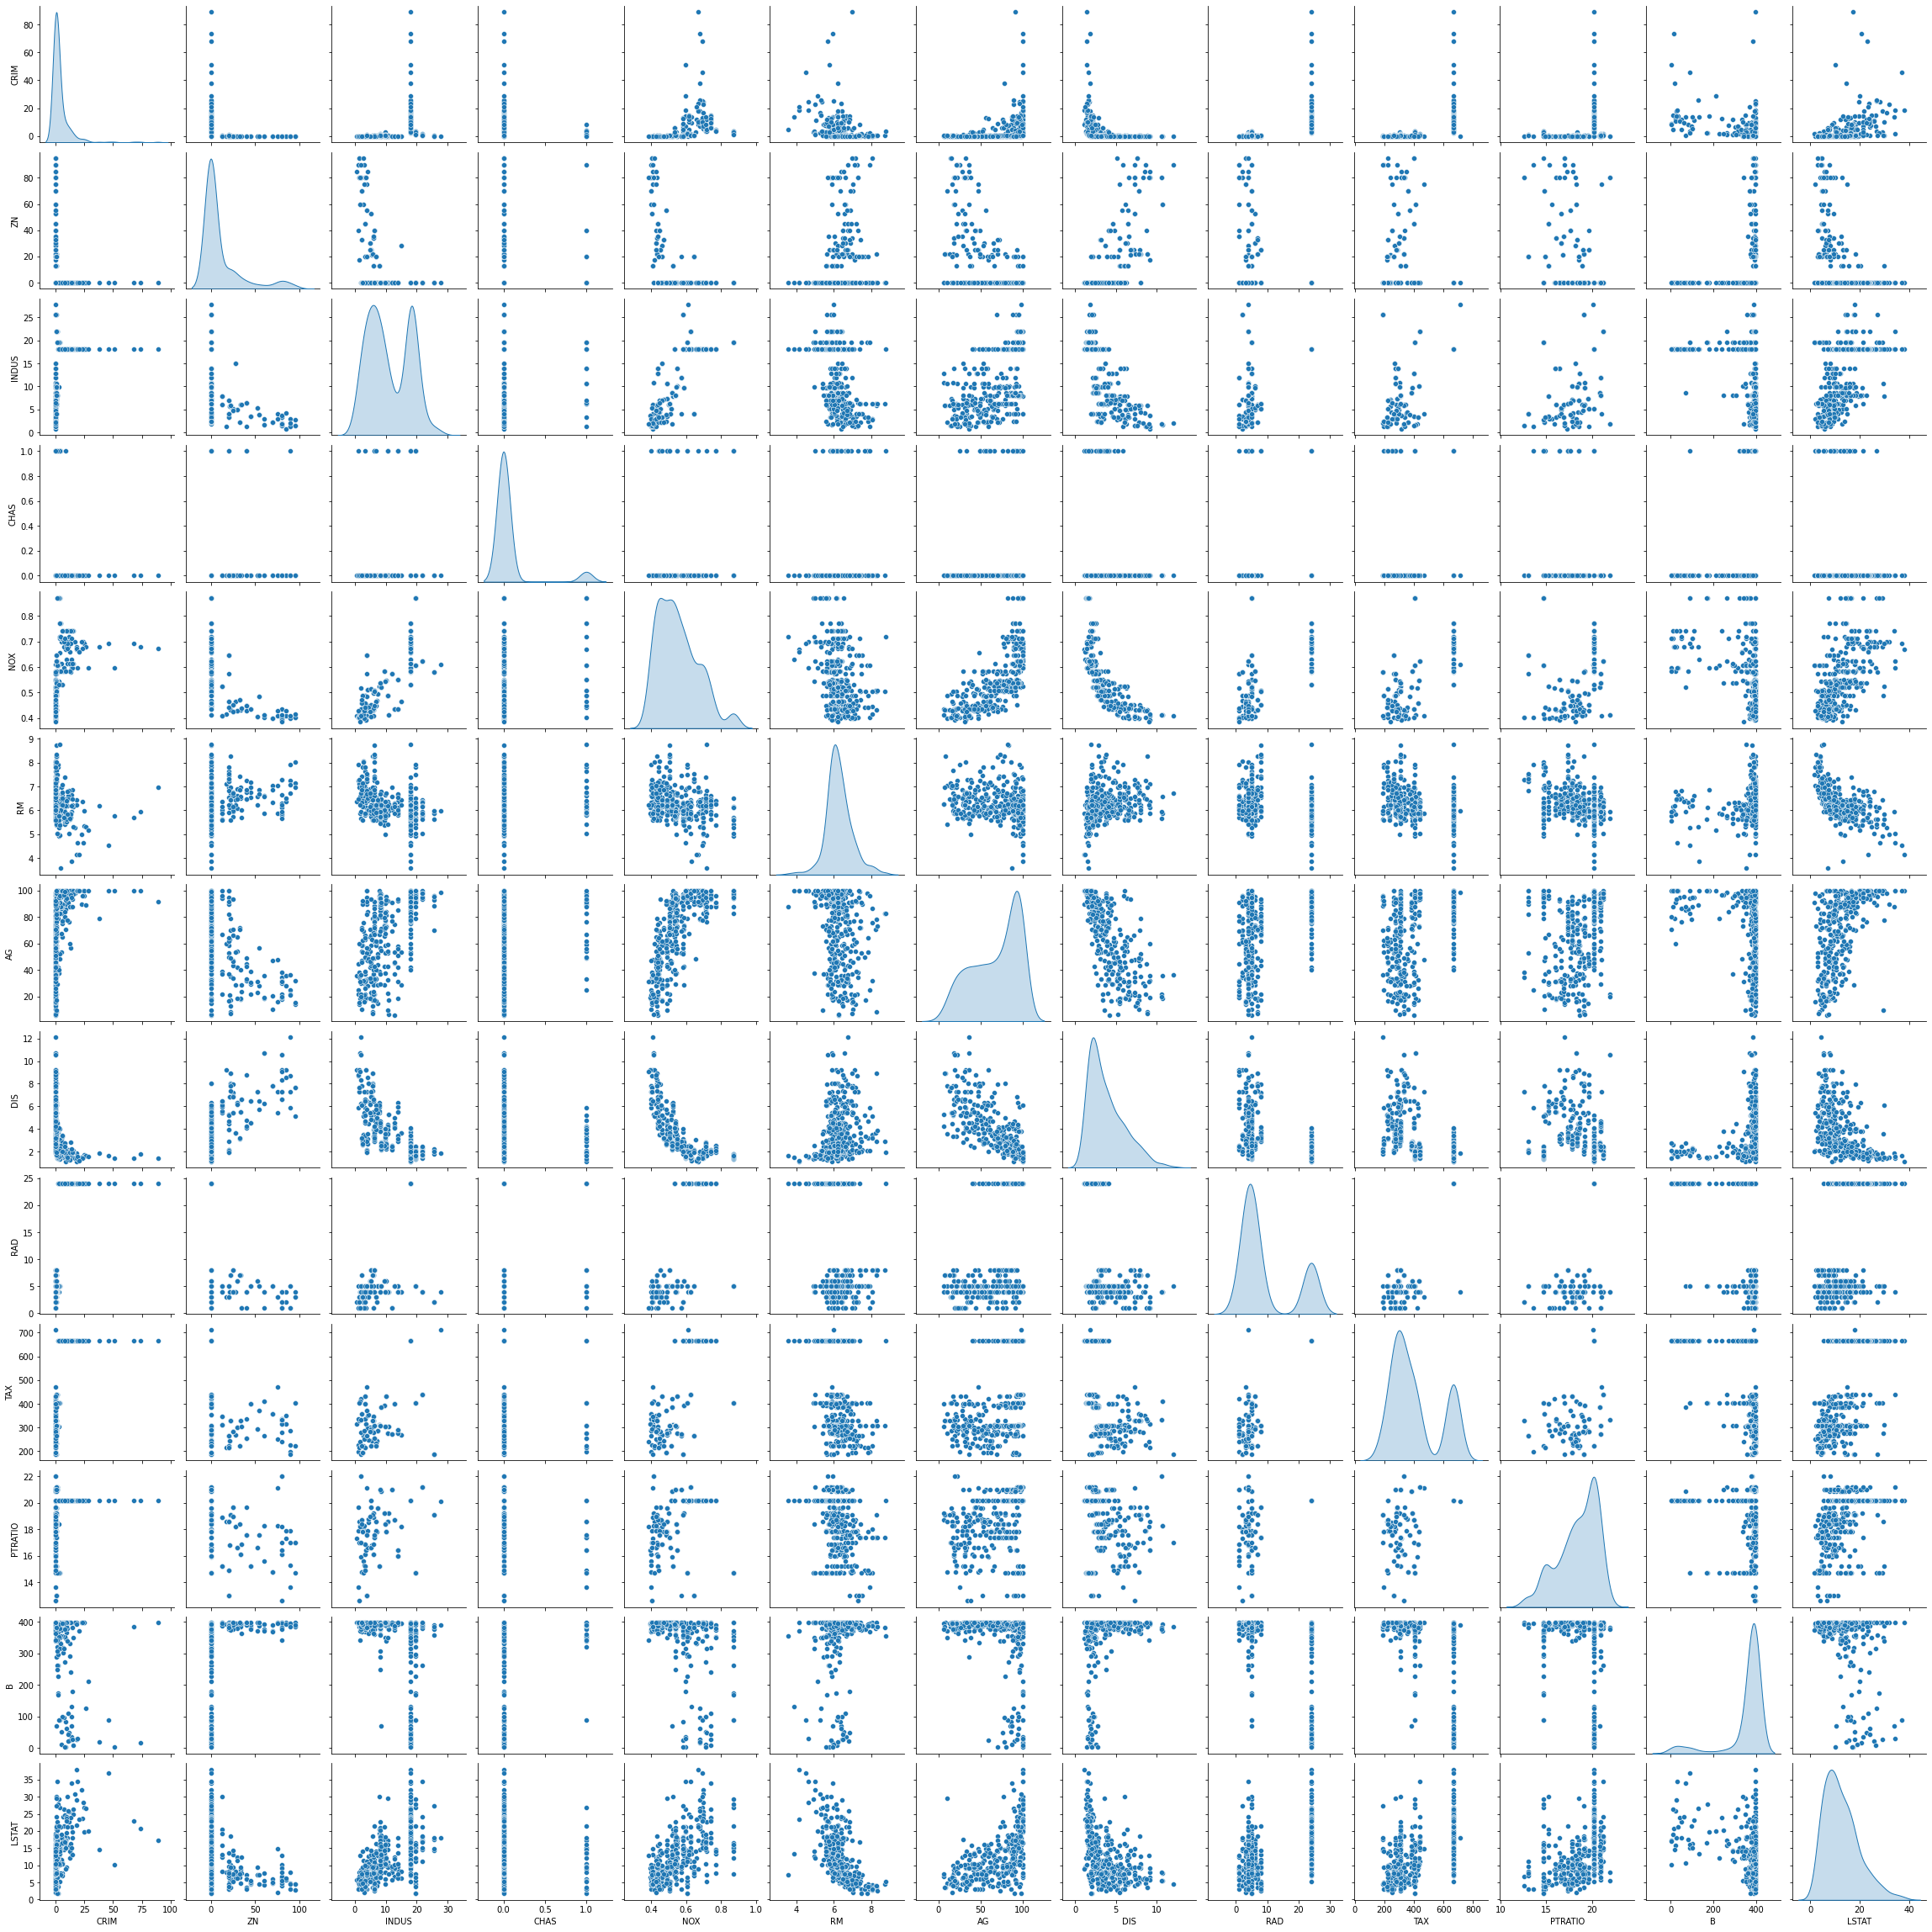

In [73]:
sns.pairplot(train_dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AG', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], diag_kind='kde')

Statistik data

In [13]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AG,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


Terlihat secara keseluruhan data, bahwa terjadi berbedaan rang nilai yang signifikan. Sehingga diperlukan proses normalisasi ke range yg sama

## Praprocesing

Dilakukan proses normalisasi data

In [14]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.767375,9.418497
ZN,11.079096,23.070178
INDUS,11.185254,6.646944
CHAS,0.070621,0.256554
NOX,0.554098,0.115748
RM,6.265791,0.699380
AG,68.057627,27.953167
DIS,3.844439,2.187514
RAD,9.440678,8.569207
TAX,407.500000,162.296676


In [15]:
# Normalisasi Data dengan menggundakan Normalisasi Min Max
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [16]:
# Data training setelah normalisasi
normed_train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,-0.392858,-0.480235,-1.195324,-0.275269,-0.812953,0.096098,-1.819387,0.626356,-0.634910,0.138635,-0.726275,0.234841,-0.751260
371,0.580233,-0.480235,1.040289,-0.275269,0.664389,-0.071193,1.142710,-1.223004,1.699028,1.592762,0.808798,0.140233,-0.439304
219,-0.387867,-0.480235,0.406916,3.622544,-0.035405,0.153292,0.870827,-0.219948,-0.518213,-0.810245,-0.958862,0.428337,-0.301132
403,2.233299,-0.480235,1.040289,-0.275269,1.200033,-1.310863,0.999614,-0.979029,1.699028,1.592762,0.808798,0.461334,1.019339
78,-0.394003,-0.480235,0.247444,-0.275269,-1.011659,-0.048316,-0.513631,0.534699,-0.518213,-0.058535,0.111037,0.351690,-0.039032


## Model

Model regrasi yang akan dianalisis pada eksplorasi ini adalah terkait dengan nilai MEDV = Nilai rata-rata harga rumah yang ditempati oleh pemilik. Jika nilai prediksi regresi lebih dari media maka dapat dikatakan harga rumah adalah mahal, dan sebaliknya

### Model Optimizers

Mencari tahu optimizers terbaik dengan loss "MSE" dan beberapa hyperparameter berikut:

- Jumlah layer 1
- Hiden unit = 13 (sesuai dengan jumlah atribut)
- Aactivation Function = ReLu

In [349]:
def build_model(opti):
  model = keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(1, activation='linear')
  ])

  if opti == 'Adam':
    optimizer = tf.keras.optimizers.Adam()
  if opti == 'SGD':
    optimizer = tf.keras.optimizers.SGD()
  if opti == 'RMSprop':
    optimizer = tf.keras.optimizers.RMSprop()

  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

model = build_model('Adam');
history1 = model.fit(normed_train_data, # ADAM
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('SGD');
history2 = model.fit(normed_train_data, #SGD
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('RMSprop');
history3 = model.fit(normed_train_data, #RMSprop
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [358]:
hist1 = pd.DataFrame(history1.history)
hist2 = pd.DataFrame(history2.history)
hist3 = pd.DataFrame(history3.history)
print("Model Standar - Adam: %.2f (%.2f) MSE" % (hist1['mse'].mean(), hist1['mse'].std()))
print("Model Standar - SGD: %.2f (%.2f) MSE" % (hist2['mse'].mean(), hist2['mse'].std()))
print("Model Standar - RMSprop: %.2f (%.2f) MSE" % (hist3['mse'].mean(), hist3['mse'].std()))

Model Standar - Adam: 173.63 (168.57) MSE
Model Standar - SGD: 17.73 (25.71) MSE
Model Standar - RMSprop: 212.61 (179.18) MSE


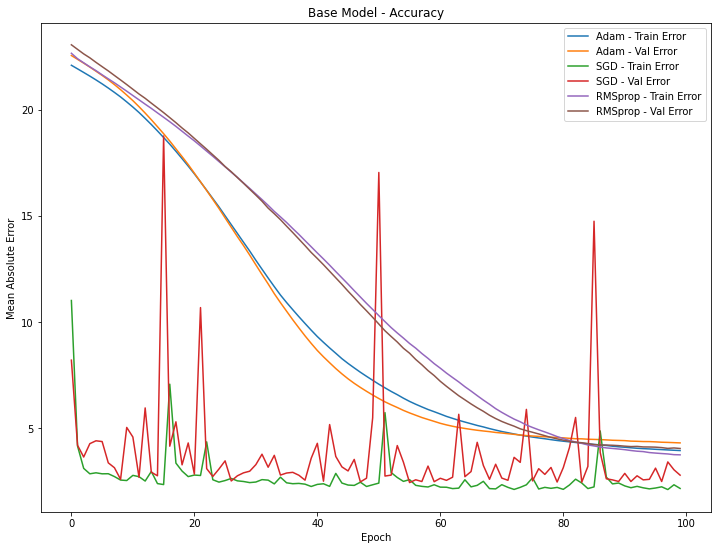

In [365]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(history1.epoch, hist1['mae'], label='Adam - Train Error')
plt.plot(history1.epoch, hist1['val_mae'], label = 'Adam - Val Error')
plt.plot(history2.epoch, hist2['mae'], label='SGD - Train Error')
plt.plot(history2.epoch, hist2['val_mae'], label = 'SGD - Val Error')
plt.plot(history3.epoch, hist3['mae'], label='RMSprop - Train Error')
plt.plot(history3.epoch, hist3['val_mae'], label = 'RMSprop - Val Error')
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('BaseModel-Accuracy-Optimizers.jpg')
plt.show()

Dari hasil eksplorasi pada optimizer didapatkan nilai MSE

- Adam: rata-rata MSE 173.63 standar deviasi MSE 168.57
- *SGD: rata-rata MSE 17.73 standar deviasi MSE 25.71*
- RMSprop: rata-rata MSE 212.61 standar deviasi MSE 179.18

Maka Oprimizer terbaik adalah **SGD**

### Model Activation_Function

Mengeksplodasi Activation_Function dari optimizer SGD

- Jumlah layer 1
- Hiden unit = 13 (sesuai dengan jumlah atribut)
- optimizer = SGD

In [366]:
def build_model(activation_):
  model = keras.Sequential([
    tf.keras.layers.Dense(13, activation=activation_, input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('relu');
history4 = model.fit(normed_train_data, # ReLu
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('softmax');
history5 = model.fit(normed_train_data, # softmax
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [369]:
hist4 = pd.DataFrame(history4.history)
hist5 = pd.DataFrame(history5.history)
print("Model Standar - SGD - ReLu: %.2f (%.2f) MSE" % (hist4['mse'].mean(), hist4['mse'].std()))
print("Model Standar - SGD - SoftMax: %.2f (%.2f) MSE" % (hist5['mse'].mean(), hist5['mse'].std()))

Model Standar - SGD - ReLu: 14.82 (21.00) MSE
Model Standar - SGD - SoftMax: 34.16 (56.97) MSE


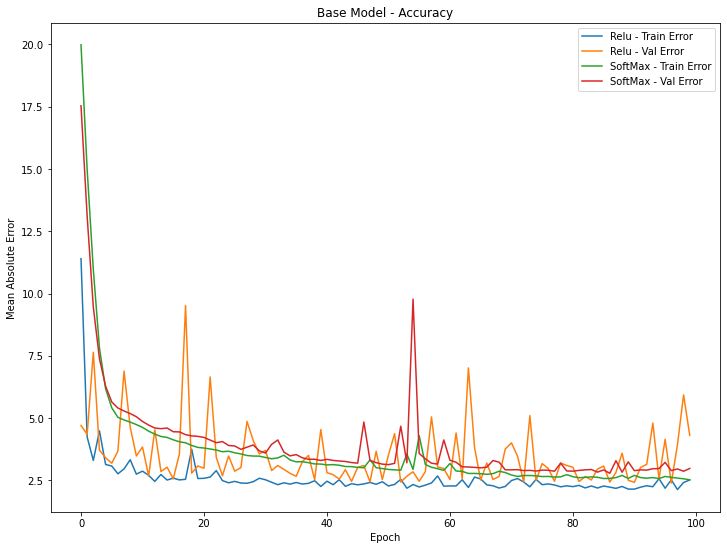

In [370]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(history4.epoch, hist4['mae'], label='Relu - Train Error')
plt.plot(history4.epoch, hist4['val_mae'], label = 'Relu - Val Error')
plt.plot(history5.epoch, hist5['mae'], label='SoftMax - Train Error')
plt.plot(history5.epoch, hist5['val_mae'], label = 'SoftMax - Val Error')
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('BaseModel-Accuracy-Activation-Function.jpg')
plt.show()

Dari hasil eksplorasi pada Fungsi Aktivasi didapatkan nilai MSE terkecil

- ReLu: rata-rata MSE 14.82 standar deviasi MSE 21.00
- SoftMax: rata-rata MSE 34.16 standar deviasi MSE 56.97

Maka Fungsi Aktivasi terbaik adalah **ReLu**

### Model Jumlah Hiden Unit (Neuron)

Mengkesplorasi jumlah Hidden Unit menggunakan hyperparameter terbaik dari model sebelumnya

- Jumlah layer = 1
- Activation_Function = ReLu
- Optimizer = SGD

In [15]:
def build_model(unit):
  model = keras.Sequential([
    tf.keras.layers.Dense(unit, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD() # Berubahan optimizers
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(13);
history6 = model.fit(normed_train_data, # 13
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(32);
history7 = model.fit(normed_train_data, # 32
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(64);
history8 = model.fit(normed_train_data, # 64
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(128);
history9 = model.fit(normed_train_data, # 128
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])

In [19]:
hist6 = pd.DataFrame(history6.history)
hist7 = pd.DataFrame(history7.history)
hist8 = pd.DataFrame(history8.history)
hist9 = pd.DataFrame(history9.history)
print("Model Standar - SGD - Relu - 13: %.2f (%.2f) MSE" % (hist6['mse'].mean(), hist6['mse'].std()))
print("Model Standar - SGD - Relu - 32: %.2f (%.2f) MSE" % (hist7['mse'].mean(), hist7['mse'].std()))
print("Model Standar - SGD - Relu - 64: %.2f (%.2f) MSE" % (hist8['mse'].mean(), hist8['mse'].std()))
print("Model Standar - SGD - Relu - 128: %.2f (%.2f) MSE" % (hist9['mse'].mean(), hist9['mse'].std()))

Model Standar - SGD - Relu - 13: 15.78 (24.75) MSE
Model Standar - SGD - Relu - 32: 14.29 (19.74) MSE
Model Standar - SGD - Relu - 64: 12.90 (17.85) MSE
Model Standar - SGD - Relu - 128: 12.46 (16.43) MSE


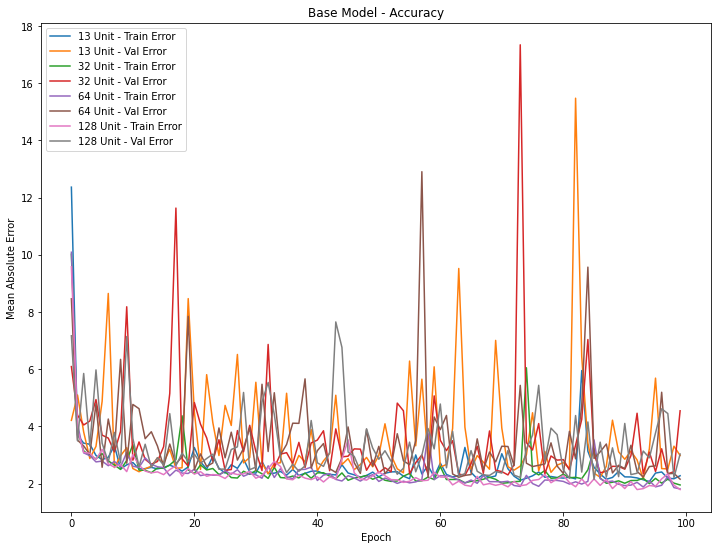

In [20]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(history6.epoch, hist6['mae'], label='13 Unit - Train Error')
plt.plot(history6.epoch, hist6['val_mae'], label = '13 Unit - Val Error')
plt.plot(history7.epoch, hist7['mae'], label='32 Unit - Train Error')
plt.plot(history7.epoch, hist7['val_mae'], label = '32 Unit - Val Error')
plt.plot(history8.epoch, hist8['mae'], label='64 Unit - Train Error')
plt.plot(history8.epoch, hist8['val_mae'], label = '64 Unit - Val Error')
plt.plot(history9.epoch, hist9['mae'], label='128 Unit - Train Error')
plt.plot(history9.epoch, hist9['val_mae'], label = '128 Unit - Val Error')
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('BaseModel-Accuracy-Hidden Unit.jpg')
plt.show()

Dari hasil eksplorasi pada Jumlah Hidden Unit, untuk nilai MSE terkecil

- 13: rata-rata MSE 15.78 standar deviasi MSE 24.75
- 32: rata-rata MSE 14.29 standar deviasi MSE 19.74
- 64: rata-rata MSE 12.90 standar deviasi MSE 17.85
- *128: rata-rata MSE 12.46 standar deviasi MSE 16.43*

Maka Jumlah Hidden Unit terbaik adalah **128**

### Model Jumlah Hidden Layer

Eksplorasi dilakukan dengan menggunakan hyperparameter terbaik dari model-model sebelumnya yang menggunakan 1 hidden layer yaitu

Layer 1
- Activation_Function = ReLu
- Optimizer = SGD
- Jumlah Hidden Unit = 64 & 128

Selanjutnya dilakukan eksplorasi pada layer ke 2 dengan hyperparameter default

Layer 2 
- Activation_Function = ReLu
- Optimizer = SGD

#### Berapa jumlah hidden unit terbaik pada layer ke 2 ?

Dengan menggunakan hyperparameter pada layer 1 adalah
- Jumlah hidden unit = 64
- Fungsi aktivasi = 'relu'

Maka berpa jumlah hiden unit pada Layer ke 2

In [187]:
def build_model(unit):
  model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(unit, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(32);
history10 = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(64);
history11 = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(128);
history12 = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [192]:
hist10 = pd.DataFrame(history10.history)
hist11 = pd.DataFrame(history11.history)
hist12 = pd.DataFrame(history12.history)

print("Ekslorasi Hidden Layer Ke 2 (64 Hidden Unit)")
print("Model Standar - SGD - Relu - 32: %.2f (%.2f) MSE" % (hist10['mse'].mean(), hist10['mse'].std()))
print("Model Standar - SGD - Relu - 64: %.2f (%.2f) MSE" % (hist11['mse'].mean(), hist11['mse'].std()))
print("Model Standar - SGD - Relu - 128: %.2f (%.2f) MSE" % (hist12['mse'].mean(), hist12['mse'].std()))

Ekslorasi Hidden Layer Ke 2
Model Standar - SGD - Relu - 32: 3.41 (23.24) MSE
Model Standar - SGD - Relu - 64: 2.58 (17.54) MSE
Model Standar - SGD - Relu - 128: 2.50 (12.83) MSE



Dengan menggunakan hyperparameter pada layer 1 adalah
- Jumlah hidden unit = 128
- Fungsi aktivasi = 'relu'

Maka berpa jumlah hiden unit pada Layer ke 2

In [201]:
def build_model(unit):
  model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(unit, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(32);
history10_ = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(64);
history11_ = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model(128);
history12_ = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [206]:
hist10_ = pd.DataFrame(history10_.history)
hist11_ = pd.DataFrame(history11_.history)
hist12_ = pd.DataFrame(history12_.history)

print("Ekslorasi Hidden Layer Ke 2 (128 Hidden Unit)")
print("Model Standar - SGD - Relu - 32: %.2f (%.2f) MSE" % (hist10_['mse'].mean(), hist10_['mse'].std()))
print("Model Standar - SGD - Relu - 64: %.2f (%.2f) MSE" % (hist11_['mse'].mean(), hist11_['mse'].std()))
print("Model Standar - SGD - Relu - 128: %.2f (%.2f) MSE" % (hist12_['mse'].mean(), hist12_['mse'].std()))

Ekslorasi Hidden Layer Ke 2 (128 Hidden Unit)
Model Standar - SGD - Relu - 32: 3.46 (19.16) MSE
Model Standar - SGD - Relu - 64: 2.15 (11.17) MSE
Model Standar - SGD - Relu - 128: 2.24 (13.75) MSE


#### Apa fungsi aktiviasi terbaik pada layer ke 2 ?

Dengan menggunakan hyperparameter pada layer 1 adalah
- Jumlah hidden unit = 64
- Fungsi aktivasi = 'relu'

Apa fungsi aktiviasi terbaik pada Layer ke 2 ?

In [197]:
def build_model(activation_):
  model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(128, activation=activation_),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('relu');
history13 = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('softmax');
history14 = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [200]:
hist13 = pd.DataFrame(history13.history)
hist14 = pd.DataFrame(history14.history)

print("Ekslorasi Hidden Layer Ke 2 (64 Hidden Unit)")
print("Model Standar - SGD - Relu - 128: %.2f (%.2f) MSE" % (hist13['mse'].mean(), hist13['mse'].std()))
print("Model Standar - SGD - Softmax - 128: %.2f (%.2f) MSE" % (hist14['mse'].mean(), hist14['mse'].std()))

Ekslorasi Hidden Layer Ke 2
Model Standar - SGD - Relu - 128: 2.48 (14.28) MSE
Model Standar - SGD - Softmax - 128: 8.88 (25.62) MSE


Dengan menggunakan hyperparameter pada layer 1 adalah
- Jumlah hidden unit = 128
- Fungsi aktivasi = 'relu'

Apa fungsi aktiviasi terbaik pada Layer ke 2 ?

In [207]:
def build_model(activation_):
  model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(128, activation=activation_),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('relu');
history13_ = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model = build_model('softmax');
history14_ = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])

In [210]:
hist13_ = pd.DataFrame(history13_.history)
hist14_ = pd.DataFrame(history14_.history)

print("Ekslorasi Hidden Layer Ke 2 (128 Hidden Unit)")
print("Model Standar - SGD - Relu - 128: %.2f (%.2f) MSE" % (hist13_['mse'].mean(), hist13_['mse'].std()))
print("Model Standar - SGD - Softmax - 128: %.2f (%.2f) MSE" % (hist14_['mse'].mean(), hist14_['mse'].std()))

Ekslorasi Hidden Layer Ke 2 (128 Hidden Unit)
Model Standar - SGD - Relu - 128: 2.23 (13.38) MSE
Model Standar - SGD - Softmax - 128: 10.47 (25.27) MSE


### Model Terbaik

Sehingga dari semua eksplorasi yang dilakukan didapatkan informasi bahwa hyper parameter yang didapatkan adalah

- Jumlah Layer = 2
- Jumlah Hidden Unit Layer 1 = 128
- Jumlah Hidden Unit Layer 2 = 64
- Activation Function Layer 1 = ReLu
- Activation Function Layer 2 = ReLu
- Optimizer = SGD
- Loss Function = MSE

## Visualisasi

Dari hasil eksplorasi hyperparamer diatas didapatkan model dengan hyper parameter yang menghasilkan nilai MSE terkecil

- Jumlah Layer = 2
- Jumlah Hidden Unit Layer 1 = 128
- Jumlah Hidden Unit Layer 2 = 64
- Activation Function Layer 1 = ReLu
- Activation Function Layer 2 = ReLu
- Optimizer = SGD
- Loss Function = MSE

In [17]:
def build_model():
  model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

In [21]:
BATCH_SIZE = 32
EPOCHS = 100
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model_best = build_model();
history_last = model_best.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................

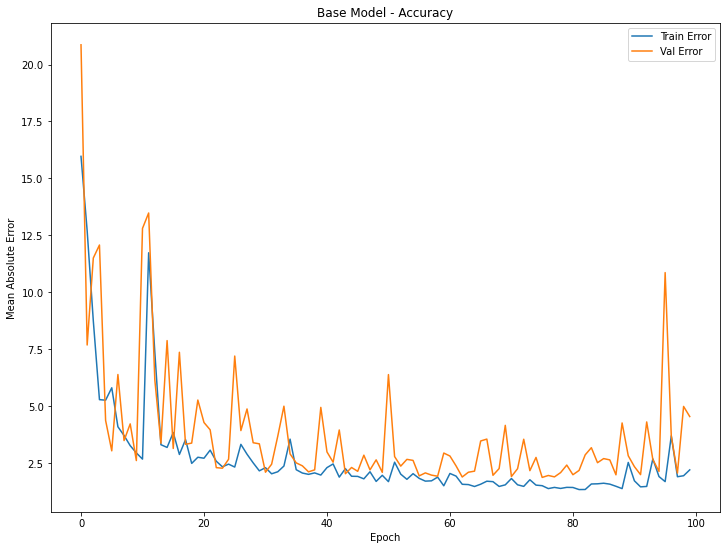

In [22]:
hist = pd.DataFrame(history_last.history)
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(history_last.epoch, hist['mae'], label='Train Error')
plt.plot(history_last.epoch, hist['val_mae'], label = 'Val Error')
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('BaseModel-Accuracy.jpg')
plt.show()


Dari Gambar di atas, terlihat bahwa terjadi overfit

## Best Model

Terjadi overfit sehingga perlu dilakukan proses EarlyStopping


In [ ]:
def build_model():
  model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])
  optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae', 'mse'])
  return model

model_best = build_model();
model_best.summary()

In [24]:
BATCH_SIZE = 32
EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_last = model_best.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(normed_test_data, test_labels),
                    verbose=0,
                    callbacks=[callback])

In [25]:
hist_last = pd.DataFrame(history_last.history)
hist_last.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
5,19.508766,3.076921,19.508766,17.125242,2.728971,17.125242
6,15.872338,2.677541,15.872338,101.408455,7.173027,101.408455
7,59.264252,5.214682,59.264252,23.930380,3.255571,23.930380
8,16.467972,2.818098,16.467972,12743.299805,68.200180,12743.299805
9,933.081665,18.026152,933.081665,265.318024,13.209205,265.318024


## Kesimpulan

Dari hasil eksplorasi hyperparamer di atas didapatkan model dengan hyperparameter yang menghasilkan nilai MSE terkecil adalah

- Jumlah Layer = 2
- Jumlah Hidden Unit Layer 1 = 128
- Jumlah Hidden Unit Layer 2 = 64
- Activation Function Layer 1 = ReLu
- Activation Function Layer 2 = ReLu
- Optimizer = SGD
- Loss Function = MSE